In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint

file = "BradleyDoublePlusGoodMeltingPointDataset.xlsx"
data = pd.read_excel(file, usecols = ['smiles','mpC'])

print ("the number of data point is ", data.shape)


fp_case = 0
fp_len = 128

the number of data point is  (3041, 2)


In [2]:
all_smiles = data['smiles'].values
all_y = data['mpC'].values

print ("THESE SMILES STRINGS ARE NOT CORRECT, REMOVE DATA:")

smiles = []
y = []
for idx in range(len(all_smiles)):
    tsmiles = all_smiles[idx]
    tmol = Chem.MolFromSmiles(tsmiles, sanitize=False)
    problems = Chem.DetectChemistryProblems(tmol)
    if (len(problems)>0):
        print (tsmiles)
    else:
        smiles.append(tsmiles)
        y.append(all_y[idx])

THESE SMILES STRINGS ARE NOT CORRECT, REMOVE DATA:
c1cccn1
N#Cc3cncc3c1cccc2OC(F)(F)Oc12
COc1cc(cc(OC)c1OC)/C=C/C(=O)O[C@@H]3C[C@@H]4CN5CCc2c6ccc(OC)cc6nc2[C@H]5C[C@@H]4[C@@H]([C@H]3OC)C(=O)OC
c1cncn1
c1cccc2nccc12
Cc1cc2nnnc2cc1
O=C(OC)[C@@]2(C[C@H]4C[C@@](O)(CC)C[N@@](CCc1c3ccccc3nc12)C4)c5cc9c(cc5OC)N(C=O)[C@@H]6[C@]98CCN7CC=C[C@@](CC)([C@@H](OC(C)=O)[C@]6(O)C(=O)OC)[C@H]78
[O-][N+](=O)c1ccc2ncnc2c1
[O-][N+](=O)c1cnc(C)n1
c1cccc2ncnc12
Cc2cnc1ccccc12
c1cccc2nnnc12
n2cnc(NCc1ccccc1)c3ncnc23
n1c3ccccc3nc1c2cscn2
N[C@@H](Cc1cncn1)C(=O)O
Sc1nc2ccccc2n1


RDKit ERROR: [21:02:53] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [21:02:53] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
RDKit ERROR: 
RDKit ERROR: [21:02:53] Can't kekulize mol.  Unkekulized atoms: 24 25 26 27 28 31 32 33 34
RDKit ERROR: 
RDKit ERROR: [21:02:53] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [21:02:53] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [21:02:53] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [21:02:53] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [21:02:53] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [21:02:53] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
RDKit ERROR: 
RDKit ERROR: [21:02:53] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [21:02:54] Can't kekulize mol.  Unkekul

In [3]:
data = pd.DataFrame(list(zip(smiles, y)), columns = ['smiles', 'mpC'])
data['Mol'] = data['smiles'].apply(Chem.MolFromSmiles)

In [4]:
data.head()

,smiles,mpC,Mol
0,C1(CCC1)C,-161.51,<rdkit.Chem.rdchem.Mol object at 0x7fb977fd0530>
1,[O-][N+]#N,-90.80,<rdkit.Chem.rdchem.Mol object at 0x7fb9a6b22940>
2,FS(F)(=O)=O,-135.80,<rdkit.Chem.rdchem.Mol object at 0x7fb97c673530>
3,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.80,<rdkit.Chem.rdchem.Mol object at 0x7fb9a6ad1210>
4,BrBr,-7.20,<rdkit.Chem.rdchem.Mol object at 0x7fb9a6abeee0>


In [5]:
from rdkit.Chem.rdMolDescriptors import *

from rdkit.Chem.AtomPairs.Sheridan import GetBPFingerprint
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Avalon.pyAvalonTools import GetAvalonFP
from rdkit.Chem.AllChem import  GetMorganFingerprintAsBitVect, GetErGFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import rdkit.DataStructs.cDataStructs

In [6]:
from rdkit.Chem import rdqueries
def element_count(mol, Zelement):
    q = rdqueries.AtomNumEqualsQueryAtom(Zelement)
    return len(mol.GetAtomsMatchingQuery(q))

In [7]:
from sklearn.preprocessing import StandardScaler

def generate_fingerprint(mol, fp_case, fp_len):
    #print ("Using the fingerprint:")
    if (fp_case==0):
        #print ("Estate (1995)")
        return FingerprintMol(mol)[0]
    elif (fp_case==1):
        #print ("Morgan circular")
        return GetMorganFingerprintAsBitVect(mol, 2, fp_len)
    elif (fp_case==2):
        #print ("Atom pair (1985)")
        return GetHashedAtomPairFingerprintAsBitVect(mol, fp_len)
    elif (fp_case==3):
        print ("Topological torsion (1987)")
        return GetHashedTopologicalTorsionFingerprintAsBitVect(mol, fp_len)
    elif (fp_case==4):
        print ("Avalon bit based (2006)")
        return GetAvalonFP(mol, fp_len)
    elif (fp_case==5):
        print ("Avalon+mol. weight")
        return np.append(GetAvalonFP(mol, fp_len), Descriptors.MolWt(mol))
    elif (fp_case==6):
        print ("RDKit fingerprint")
        return RDKFingerprint(mol, fpSize=fp_len)
    elif (fp_case==7):
        print ("ErG fingerprint (2006)")
        return GetErGFingerprint(mol)


#Scale X to unit variance and zero mean
data['Fingerprint'] = data['Mol'].apply(generate_fingerprint, fp_case=fp_case, fp_len=fp_len)

fp_element_count = False
data['C_count'] = data['Mol'].apply(element_count, Zelement=6)
data['N_count'] = data['Mol'].apply(element_count, Zelement=7)
data['O_count'] = data['Mol'].apply(element_count, Zelement=8)
X1 = data[['C_count','N_count','O_count']].values

fp_add_fp2 = False
data['Fingerprint_2'] = data['Mol'].apply(generate_fingerprint, fp_case=fp_case+1, fp_len=fp_len)
X2 = np.array(list(data['Fingerprint_2']))
fp_add_fp3 = False
data['Fingerprint_3'] = data['Mol'].apply(generate_fingerprint, fp_case=fp_case+2, fp_len=fp_len)
X3 = np.array(list(data['Fingerprint_3']))

X = np.array(list(data['Fingerprint']))
if fp_element_count:
    X = np.concatenate((X,X1), axis=1)
if fp_add_fp2:
    X = np.concatenate((X,X2), axis=1)
if fp_add_fp3:
    X = np.concatenate((X,X3), axis=1)


st = StandardScaler()
X = st.fit_transform(X)

In [8]:
print ("The shape of the fingerprint is", X.shape)

The shape of the fingerprint is (3025, 79)


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


<Figure size 432x288 with 0 Axes>

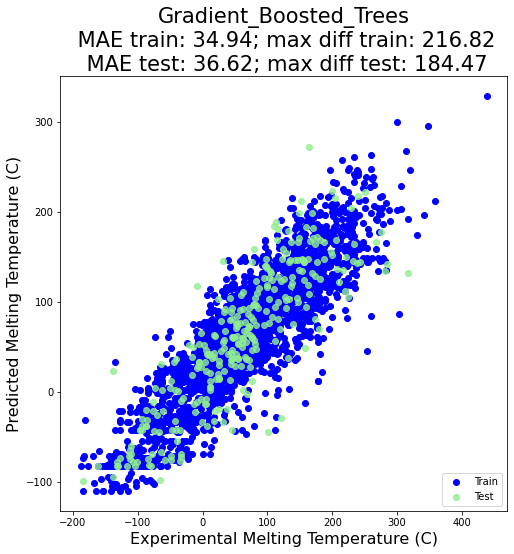

<Figure size 432x288 with 0 Axes>

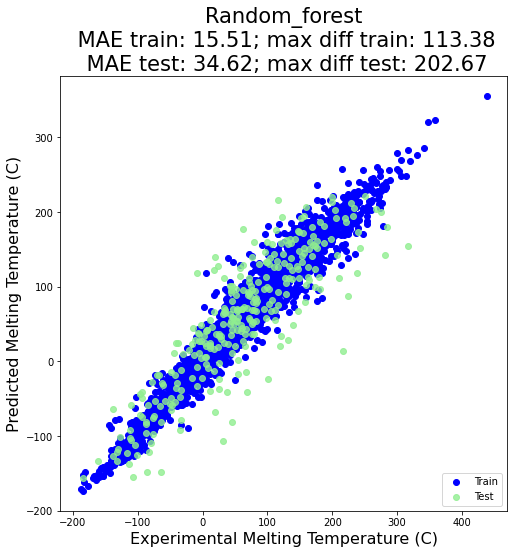

<Figure size 432x288 with 0 Axes>

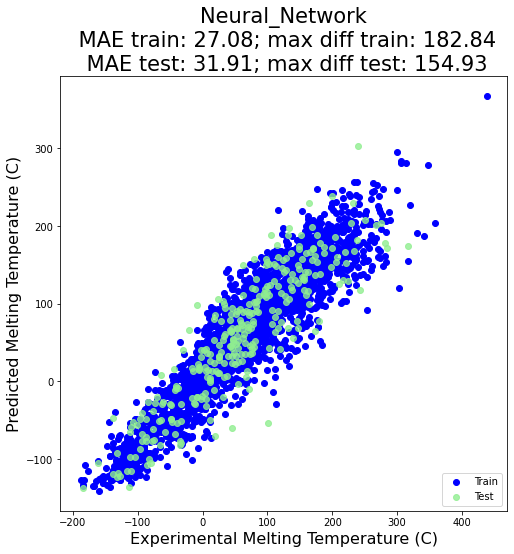

\begin{tabular}{c c c}
           name     &     test MAE err   & .    abs error in CV \\ 
\hline
                Neural_Network & 31.912 & 31.844 \\
                 Random_forest & 34.621 & 34.635 \\
        Gradient_Boosted_Trees & 36.617 & 37.912 \\
\end{tabular}


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

from sklearn.model_selection import cross_val_score

import pickle


def make_scatter_plot(y_pred_train, y_pred_test, y_train, y_test, title, figsize, fontsize, fname):    
    plt.clf()
    f = plt.figure(figsize=figsize)
    plt.scatter(y_train,y_pred_train, label = 'Train', c='blue')
    plt.title(title,fontsize=fontsize+5)
    plt.xlabel('Experimental Melting Temperature (C)', fontsize=fontsize)
    plt.ylabel('Predicted Melting Temperature (C)', fontsize=fontsize)
    plt.scatter(y_test,y_pred_test,c='lightgreen', label='Test', alpha = 0.8)
    plt.legend(loc=4)
    #plt.xlim(-200,500)
    #plt.ylim(-200,500)
    plt.show()
    f.savefig(fname+".pdf")

from sklearn.model_selection import train_test_split

def test_models_and_plot(x, y, model_dict, plots, fp_case, fp_len):
    ''' test a bunch of models and print out a sorted list of CV accuracies
        inputs: 
            x: training data features, numpy array or Pandas dataframe
            y: training data labels, numpy array or Pandas dataframe
            model_dict: a dictionary of the form {name : model()}, where 'name' is a string
                        and 'model()' is a scikit-learn model object. 
    '''

    mean_scores = {}
    percent_errors = {}
    
    for (name, model) in model_dict.items():
        #print("running %s" % name)
        scores = cross_val_score(model, x, y, cv=20, n_jobs=-1, scoring='neg_mean_absolute_error')
        scores = -1*scores
        mean_score = scores.mean()
        mean_scores[name] = mean_score

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
        model.fit(X_train, y_train)
        # save the model to disk
        filename = name + "_" + str(fp_case) + "_" + str(fp_len) + ".sav"
        pickle.dump(model, open(filename, 'wb'))
        
        y_pred_train = model.predict(X_train)
        mae_train = np.mean(np.abs(y_train-y_pred_train))
        max_train = np.max(np.abs(y_train-y_pred_train))
        y_pred_test  = model.predict(X_test)
        mae_test = np.mean( np.abs(y_test -y_pred_test))
        max_test = np.max( np.abs(y_test -y_pred_test) )
        
        percent_errors[name] = mae_test

        #fulltitle = name+'\n MAE error: '+str(percent_error)
        fulltitle = name + \
            "\n MAE train: " +  str("{:.2f}".format(mae_train)) + "; max diff train: " +  str("{:.2f}".format(max_train)) + \
            "\n MAE test: " +  str("{:.2f}".format(mae_test)) + "; max diff test: " +  str("{:.2f}".format(max_test))
        

        if plots:
            fname = name + "_" + str(fp_case) + "_" + str(fp_len)
            make_scatter_plot(y_pred_train, y_pred_test, y_train, y_test, fulltitle, (8,8), 16, fname)

    sorted_names = sorted(percent_errors, key=mean_scores.__getitem__, reverse=False)

    print("\\begin{tabular}{c c c}")
    print("           name     &     test MAE err   & .    abs error in CV \\\\ ")
    print("\\hline")
    for i in range(len(sorted_names)):
        name = sorted_names[i]
        print("%30s & %5.3f & %5.3f \\\\" % (name, percent_errors[name], mean_scores[name]))
    print("\\end{tabular}")


alpha_grid = {'alpha': np.logspace(1e-11,1e-1,8)}

model_dict = {
            #'Linear_Regression': LinearRegression(),
            #'Kernel Ridge Regression': KernelRidge(),
            #'Ridge Regression':Ridge(),
            #'Gaussian Process Regressor': GaussianProcessRegressor(normalize_y=True),
            #'Support Vector Regression': SVR(),
            #'KNeighborsRegressor': KNeighborsRegressor(),
            'Gradient_Boosted_Trees': GradientBoostingRegressor(n_estimators=100),
            'Random_forest': RandomForestRegressor(n_estimators=100),
            'Neural_Network': MLPRegressor(alpha=1000,max_iter=8000, hidden_layer_sizes=[800,600], early_stopping=False)
            }

test_models_and_plot(X, y, model_dict, plots=True, fp_case=fp_case, fp_len=fp_len)

In [11]:
import glob

filename = "A.txt"
print("read SMILES from file:", filename)
smiles = np.loadtxt(filename, dtype=str)

for tsmiles in smiles:
    print ("**********************************")
    print (tsmiles)
    tmol = Chem.MolFromSmiles(tsmiles)
    fp = generate_fingerprint(tmol, fp_case, fp_len)
    X = np.array(list(fp))
    
    X1 = []
    if fp_element_count:
        Zelement = 6
        X1.append(element_count(tmol, Zelement))
        Zelement = 7
        X1.append(element_count(tmol, Zelement))
        Zelement = 8
        X1.append(element_count(tmol, Zelement))
        X1 = np.array(X1)
        X = np.concatenate((X,X1), axis=0)
    if fp_add_fp2:
        fp_2 = generate_fingerprint(tmol, fp_case+1, fp_len)
        X2 = np.array(list(fp_2))
        X = np.concatenate((X,X2), axis=0)
    if fp_add_fp3:
        fp_3 = generate_fingerprint(tmol, fp_case+2, fp_len)
        X3 = np.array(list(fp_3))
        X = np.concatenate((X,X3), axis=0)

        
    nlen = X.shape[0]
    X = np.reshape(X, (1, nlen)) 
    print ("The shape of the fingerprint is", X.shape)
    X = st.transform(X)
    
    postname = "_" + str(fp_case) + "_" + str(fp_len) + ".sav"
    files_model = glob.glob('*'+postname)
    for f in files_model:
        model = pickle.load(open(f, 'rb'))
        y_pred = model.predict(X)
        print (f, y_pred)


read SMILES from file: A.txt
**********************************
CO[N+](=O)[O-]
The shape of the fingerprint is (1, 79)
Neural_Network_0_128.sav [-58.15032341]
Random_forest_0_128.sav [-64.2323]
**********************************
CCO[N+](=O)[O-]
The shape of the fingerprint is (1, 79)
Neural_Network_0_128.sav [-59.63628618]
Random_forest_0_128.sav [-72.41566667]
**********************************
C(C(CO[N+](=O)[O-])O[N+](=O)[O-])O[N+](=O)[O-]
The shape of the fingerprint is (1, 79)
Neural_Network_0_128.sav [37.03044751]
Random_forest_0_128.sav [60.77616667]
**********************************
C(C(CO[N+](=O)[O-])(CO[N+](=O)[O-])[N+](=O)[O-])O[N+](=O)[O-]
The shape of the fingerprint is (1, 79)
Neural_Network_0_128.sav [39.6214421]
Random_forest_0_128.sav [72.12509524]
**********************************
CC(CO[N+]([O-])=O)(CO[N+]([O-])=O)CO[N+]([O-])=O
The shape of the fingerprint is (1, 79)
Neural_Network_0_128.sav [18.20632568]
Random_forest_0_128.sav [73.0812619]
************************